<a href="https://colab.research.google.com/github/ajazturki10/COG_INT/blob/main/US_Crime_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
# 2. Dataset URL
url = 'https://raw.githubusercontent.com/a-forty-two/COG_GN22CDBDS001_MARCH_22/main/US_Crime_Rates_1960_2014.csv'

# 3. Reading Date
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [81]:
# 4. The Type of Columns

crime.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

In [80]:
# 5. Formatting Date
crime['Year'] = pd.to_datetime(crime['Year'], format = "%Y").dt.strftime('%Y-%m-%d').astype("datetime64[ns]")

In [84]:
# 6. Setting Year as Index

crime = crime.set_index("Year")

In [94]:
# 7. Dropping Total columns

crime.drop('Total', axis=1, inplace=True)

In [92]:
del crime["Population"]

In [97]:
# 8.Group the year by decades and sum the values

crime_decade = crime.groupby((crime.index.year//10)*10).sum()
crime_decade

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


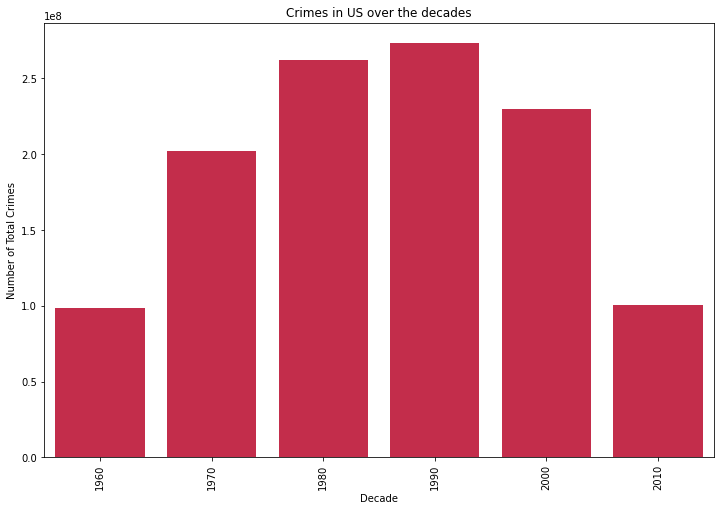

In [117]:
# 9. What is the most dangerous decade to live in the US?

plt.figure(figsize=(12, 8))
sns.barplot(crime_decade.index, crime_decade.sum(axis=1), color='crimson')
plt.xticks(rotation=90)
plt.xlabel("Decade")
plt.ylabel("Number of Total Crimes")
plt.title("Crimes in US over the decades")
plt.show()